# Graphviz

`Graph`- und `Digraph`-Objekte haben eine `_repr_svg_()`-Methode, sodass sie direkt in einem Jupyter-Notebook gerendert und dargestellt werden können.

## Einfaches Beispiel

In [1]:
import graphviz

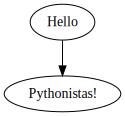

In [2]:
dot = graphviz.Digraph('hello-pythonistas', comment='Hello world example')

dot.edge('Hello', 'Pythonistas!')

dot

Ihr könnt euch auch den Quelltext ausgeben lassen mit:

In [3]:
print(dot.source)

// Hello world example
digraph "hello-pythonistas" {
	Hello -> "Pythonistas!"
}


Auch die Ausgabe des Kommentars oder anderer Elemente des Quelltexts sind möglich, z.B. mit:

In [4]:
print(dot.comment)

Hello world example


Ihr könnt auch Daten aus einem pandas DataFrame verwenden, z.B.:

In [5]:
import pandas as pd

j = {'action': ['single use', 'teamwork', 'convert', 'Java, R, Julia etc.', 'extend'],
     'view': ['Jupyter', 'JupyterHub', 'nbconvert', 'kernels', 'extensions']}

df = pd.DataFrame(j)

df

,action,view
0,single use,Jupyter
1,teamwork,JupyterHub
2,convert,nbconvert
3,"Java, R, Julia etc.",kernels
4,extend,extensions


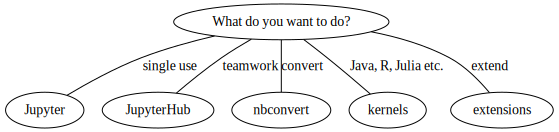

In [6]:
jm = graphviz.Graph('jupyter_moons', comment='Jupyter moons')

jm.node('What do you want to do?')

for index, row in df.iterrows():
    jm.edge('What do you want to do?', str(row["view"]), label=(str(row["action"])))
    
jm

## Styling

Ihr könnt `graph_attr`-, `node_attr`- und `edge_attr`-Argumente der `Graph`- und `Digraph`-Konstuktoren verwenden, um die [Standardattribute von Graphviz](https://www.graphviz.org/doc/info/attrs.html) für eure Graphen, Knoten und Kanten zu ändern, z.B.:

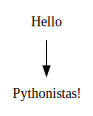

In [7]:
dot = graphviz.Digraph('hello-pythonistas',
                       comment='Hello world example',
                       node_attr={'shape': 'plaintext'})

dot.edge('Hello', 'Pythonistas!')

dot

Die `graph_attr`-, `node_attr`- und `edge_attr`-Argumente können auch auf Instanzen angewendet werden:

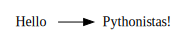

In [8]:
dot.graph_attr['rankdir'] = 'LR'

dot

Um `att_stmt`-Attributanweisungen direkt hinzuzufügen, ruft die `attr()`-Methode der `Graph`- oder `Digraph`-Instanz mit dem gewünschten Ziel als erstes Argument und den Attributen als Schlüsselwort-Argument auf.

<div class="alert alert-block alert-info">

**Hinweis:**

Attribut-Anweisungen wirken sich auf alle späteren Graphen, Knoten oder Kanten innerhalb desselben (Sub-)Graphen aus.
</div>

## Engines

Neben Dot können auch verschiedene andere [Layout Engines](https://graphviz.org/docs/layouts/) verwendet werden.

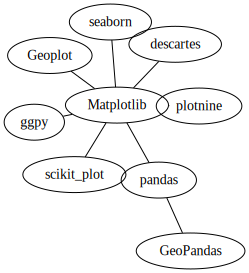

In [9]:
pvl = graphviz.Graph('python_visualisation_landscape', engine='neato')

pvl.edge('Matplotlib', 'pandas')
pvl.edge('pandas', 'GeoPandas')
pvl.edge('Matplotlib', 'Geoplot')
pvl.edge('Matplotlib', 'descartes')
pvl.edge('Matplotlib', 'seaborn')
pvl.edge('Matplotlib', 'ggpy')
pvl.edge('Matplotlib', 'plotnine')
pvl.edge('Matplotlib', 'scikit_plot')

pvl

Ihr könnt auch das `engine`-Attribut einer bestehenden Instanz ändern:

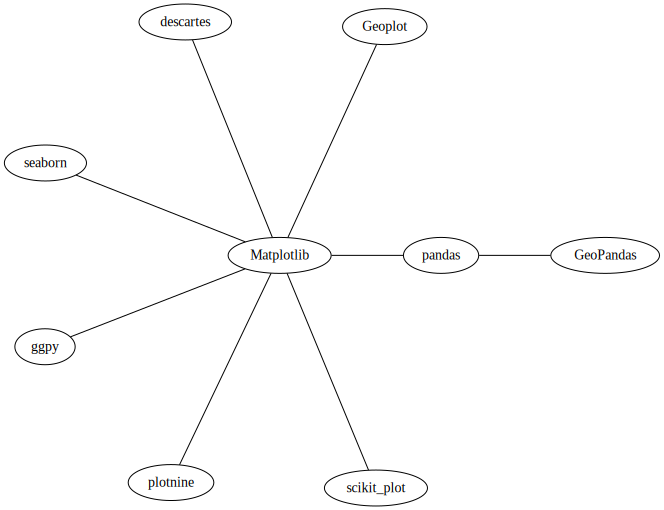

In [10]:
pvl.engine = 'circo'

pvl

Eine vollständige Übersicht über die Engines erhaltet ihr mit:

In [11]:
for engine in sorted(graphviz.ENGINES):
    print(engine)

circo
dot
fdp
neato
osage
patchwork
sfdp
twopi


## Dateien schreiben und lesen

In [12]:
graphviz.Source.save(dot)

'hello-pythonistas.gv'

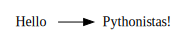

In [13]:
graphviz.Source.from_file('hello-pythonistas.gv')

## Dot-Dateien konvertieren

Eine Dot-Datei kann in ein anderes Format, z.B. PDF, PNG, SVG etc., umgewandelt werden mit `render`:

In [14]:
from graphviz import render

render('dot', 'svg', 'hello-pythonistas.gv')

'hello-pythonistas.gv.svg'

> Siehe auch:
> 
> * [graphviz manual](https://graphviz.readthedocs.io/en/stable/manual.html#jupyter-notebooks)
> * [examples/notebook](https://nbviewer.jupyter.org/github/xflr6/graphviz/blob/master/examples/notebook.ipynb)
> * [examples/graphviz-engines](https://nbviewer.jupyter.org/github/xflr6/graphviz/blob/master/examples/graphviz-engines.ipynb)
> * [examples/graphviz-escapes](https://nbviewer.jupyter.org/github/xflr6/graphviz/blob/master/examples/graphviz-escapes.ipynb)
> * [Graphviz Online](https://dreampuf.github.io/GraphvizOnline/)
